<a href="https://colab.research.google.com/github/frios2020/Project-1-GEM-/blob/main/Proj_1_Deep_Learning_GEM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Gradient Episodic Memory (GEM) for Continual Learning

NJIT Data Science Program
Course
CS677 Deep Learning - Fall 2020

Instructor
Pantelis Monogioudis, Ph.D Professor of Practice, NJIT & Adjunct NYU

Teaching Assistant
Nitesh Mistry

Students:

*   Fernando Rios
*   Hassan Ouanir
*   Maha Faruque

# Introduction:</br>
Humans and animals have the ability to continually acquire, fine-tune,
and transfer knowledge and skills throughout their lifespan. This ability, referred
to as lifelong learning, is mediated by a rich set of neurocognitive mechanisms
that together contribute to the development and specialization of our sensorimotor skills as well as to long-term memory consolidation and retrieval. Consequently, lifelong learning capabilities are crucial for computational systems
and autonomous agents interacting in the real world and processing continuous
streams of information. However, lifelong learning remains a long-standing challenge for machine learning and neural network models since the continual acquisition of incrementally available information from non-stationary data distributions
generally leads to catastrophic forgetting or interference.

This limitation represents a challenge for deep neural network models that typically learn representations from stationary batches of training data, thus without
accounting for situations in which information becomes incrementally available
over time.

There are different neural network approaches for lifelong
learning that mitigate, to different extents, catastrophic forgetting. 

* **Regularization**: Meaning there is a penalty on changing the weights of the Neural Network. The penalty increases proportionally with the (weight change) of the Neural Network. This helps in retaining the old knowledge.

* **Dynamic Architecture**: During learning a new task, new resources are allocated to learn new information (meaning, new neurons are created without changing the old weights of the network). This helps in learning new tasks without interfering with the previously gained knowledge.

* **Complimentary Learning System (CLS)**: A mixture of the two methods above. New resources are created (neurons/layers) and "some" old weights are changed


In this notebook we try explain and develop the model Gradient Episodic Memory (GEM) proposed by Lopez Paz & Ranzato 2017, which comes under CLS.


# Gradient Episodic Memory (GEM)

 This approach try alleviates
forgetting, while allowing beneficial transfer of knowledge to previous tasks. Our experiment on variants of the MNIST datasets demonstrate the
strong performance of GEM when compared to the state-of-the-art. The GEM model can be used for solving a few challenges, one of them being catastrophic forgetting. The main feature of GEM to minimize catastrophic forgetting is an episodic memory used to store a subset of the observed examples from a
given task. While minimizing the loss on the current task t, GEM treats the losses on the episodic
memories of tasks k < t as inequality constraints, avoiding their increase but allowing their decrease.  This method requires considerable more memory than other regularization approaches at training time (with an episodic memory Mk for each task k) but can work much better in the single pass setting.

## Framework

We focus on continuum of data, where each triplet (xi
, ti
, yi) is formed by a feature vector
xi ∈ Xti
, a task descriptor ti ∈ T , and a target vector yi ∈ Yti
. For simplicity, we assume that the
continuum is locally iid, that is, every triplet (xi
, ti
, yi) satisfies (xi
, yi)
iid∼ Pti
(X, Y ).</br></br>
Our goal is to learn a predictor f : X × T → Y,
which can be queried at any time to predict the target vector y associated to a test pair (x, t), where
(x, y) ∼ Pt. Such test pair can belong to a task that we have observed in the past, the current task, or
a task that we will experience (or not) in the future.</br>
**Task descriptors.** In the simplest case, the task descriptors are integers ti = i ∈ Z enumerating the
different tasks appearing in the continuum of data. </br>
**Training Protocol and Evaluation Metrics.** 
We are interested in the “more human-like” setting where i) the number of tasks is
large, ii) the number of training examples per task is small, iii) the learner observes the examples
concerning each task only once, and iv) we report metrics that measure both transfer and forgetting.
Therefore, at training time we provide the learner with only one example at the time (or a small
mini-batch), in the form of a triplet (xi
, ti
, yi). The learner never experiences the same example
twice, and tasks are streamed in sequence. We do not need to impose any order on the tasks, since a
future task may coincide with a past task.
we would like to measure:
1. **Backward transfer (BWT)**, which is the influence that learning a task t has on the performance on a previous task k ≺ t. On the one hand, there exists positive backward transfer
when learning about some task t increases the performance on some preceding task k. On
the other hand, there exists negative backward transfer when learning about some task t
decreases the performance on some preceding task k. Large negative backward transfer is
also known as (catastrophic) forgetting.</br>
2. **Forward transfer (FWT)**, which is the influence that learning a task t has on the performance
on a future task k  t. In particular, positive forward transfer is possible when the model is
able to perform “zero-shot” learning, perhaps by exploiting the structure available in the
task descriptors.</br>

## Metrics

### Average Accuracy : <br />
is calculated on the test data, Backward transfer, and Forward transfer. <br />
- Notation : <br />
R ∈ R<sup>T × T</sup> where R<sub>i,j</sub> is the test classification accuracy on task j after observing the last sample of task j after observe the last sample from task ti.
- Average Accuracy : $\frac{1}{T}$$\sum_{i=1}^{T} R_{T,i}$

### Backward transfer:
focuses on the average accuracy of every task i after each of the next tasks are completed.
BWT = $\frac{1}{T - 1}$$\sum_{i=1}^{T - 1} R_{T,i} - R_{i,i}$ <br />
There won't be any backward transfer for first task <br />
How to calculate :-
1. Record the accuracy of each task i initially.
2. Learn task i + 1 and then record accuracy of task i
3. Since we want to know the transfer, subtract each by R<sub>i, i</sub> <br />

### Forward transfer:
focuses on the average accuracy of each task i before each of the previous tasks are completed. <br />

FWT = $\frac{1}{T - 1}$$\sum_{i=2}^{T} R_{i-1,i} - b_{i}$ <br />
There won't be any forward transfer for the last task <br />

How to calculate :-
1. Record accuracy for each task i = b<sub>i</sub> upon initialization (Random initialization)
2. Learn task 1, record accuracy for task i, repeat this until task i - 1. For all tasks
3. Subtract their respective b<sub>i</sub> from the values and divide  by T - 1 to get average accuracy

## Dataset and Architecture<br />
We use MNIST handwritten digit dataset. It consists of 60,000 images for training and 10,000 images for testing. Each image is 28*28 pixels. We rotate these digits by a certain angle and then try to predict the number. In this project we use 10 tasks (10 different rotation angles from 0 to 90 degrees). Which means each of the 10 tasks has 60,000 images for training and 10,000 images for testing.
The model observes the tasks in sequence, and each example once. The evaluation for each task is performed n the test partition of each dataset.</br>
On the MNIST tasks, we use fully-connected neural networks with two (2) hidden layers of 100 ReLU units. We train all the networks using plain SGD on mini-batches of 10 samples. 


# Code

## Importing and Installing needed libraries

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess # running new applications/programs by creating new processes
import pickle # serialising the object & saving it as a pickle object
import torch # deep learning framework
import os 
from torchvision import transforms 
from PIL import Image 
import argparse # parser for command line 
import os.path 
import random
import math
import importlib
import datetime
import uuid
import time
import torch.nn as nn
from torch.nn.functional import relu, avg_pool2d

In [ ]:
# Quadratic programming library
!pip install quadprog 

## Downloading Database mnist.npz

In [ ]:
mnist_path = "mnist.npz"
# if mnist.npz is not available, it will download the the file from the URL
if not os.path.exists(mnist_path):
    subprocess.call("wget https://s3.amazonaws.com/img-datasets/mnist.npz", shell=True)

In [ ]:
# Veryfing database mnist.npz downloaded in previous line
# iterates over directories & creates list of filenames
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/content/mnist.npz
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.metricsUUID
/content/.config/configurations/config_default
/content/.config/logs/2020.10.14/16.31.46.119103.log
/content/.config/logs/2020.10.14/16.31.25.706256.log
/content/.config/logs/2020.10.14/16.30.50.869240.log
/content/.config/logs/2020.10.14/16.31.46.824031.log
/content/.config/logs/2020.10.14/16.31.10.843101.log
/content/.config/logs/2020.10.14/16.31.31.333159.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv


## Reading the data & separate in train and test dataset
---



In [ ]:
f = np.load('/content/mnist.npz')
# extracting the training data
x_tr = torch.from_numpy(f['x_train'])
y_tr = torch.from_numpy(f['y_train']).long()
# extracting the test data
x_te = torch.from_numpy(f['x_test'])
y_te = torch.from_numpy(f['y_test']).long()
f.close()
torch.save((x_tr, y_tr), 'mnist_train.pt')
torch.save((x_te, y_te), 'mnist_test.pt')
x_tr.size()[0]
# printing the data details
print('Xtrain size: [%d , %d , %d ]' % (x_tr.size()[0], x_tr.size()[1],x_tr.size()[2]))
print('Xtest size: [%d , %d , %d ]' % (x_te.size()[0], x_te.size()[1],x_te.size()[2]))
print('Ytrain size: [%d ]' % (y_tr.size()[0]))
print('Ytest size: [%d ]' % (y_te.size()[0]))

Xtrain size: [60000 , 28 , 28 ]
Xtest size: [10000 , 28 , 28 ]
Ytrain size: [60000 ]
Ytest size: [10000 ]


In [ ]:
# function to rotate dataset images
def rotate_dataset(d, rotation):
    result = torch.FloatTensor(d.size(0), 784)
    tensor = transforms.ToTensor()

    for i in range(d.size(0)):
        img = Image.fromarray(d[i].numpy(), mode='L')
        result[i] = tensor(img.rotate(rotation)).view(784)
    return result

In [ ]:
# Create training and testing datasets rotated
a_i = '../content/output'
a_ntasks = 10
a_min_rot = 0
a_max_rot = 90
a_seed = 0

# setting the seed of torch
torch.manual_seed(a_seed)

tasks_tr = []
tasks_te = []

for t in range(a_ntasks):
    min_rot = 1.0 * t / a_ntasks * (a_max_rot - a_min_rot) + \
        a_min_rot
    max_rot = 1.0 * (t + 1) / a_ntasks * \
        (a_max_rot - a_min_rot) + a_min_rot
    rot = random.random() * (max_rot - min_rot) + min_rot # random rotation

    tasks_tr.append([rot, rotate_dataset(x_tr, rot), y_tr])
    tasks_te.append([rot, rotate_dataset(x_te, rot), y_te])

## Plotting a sample from the training dataset. The origial digit with its 10 rotations:

*** Rotation angles:***
1.296997226745124
10.924626762985291
24.579862920274614
31.882954148742172
40.441910986678636
46.97209713044229
57.62313733975957
69.59007400267737
73.21021117567011
83.06995108613407


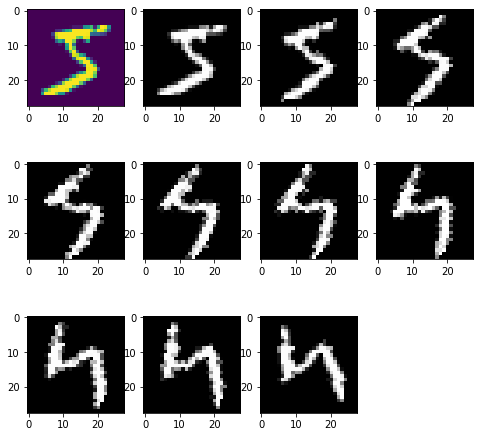

In [ ]:
w=28
h=28
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x_tr[0])
for i in range(10):
    x=tasks_tr[i][1][0]
    img = x.reshape((h, w))
    fig.add_subplot(rows, columns, i+2)
    plt.imshow(img, cmap=plt.cm.gray)

print('*** Rotation angles:***')
for i in range(10):
    print(tasks_tr[i][0])

## Definitions, Classes and Functions

In [ ]:
# Applying linear transformation
def Xavier(m):
    if m.__class__.__name__ == 'Linear':
        fan_in, fan_out = m.weight.data.size(1), m.weight.data.size(0)
        std = 1.0 * math.sqrt(2.0 / (fan_in + fan_out))
        a = math.sqrt(3.0) * std
        m.weight.data.uniform_(-a, a)
        m.bias.data.fill_(0.0)

In [ ]:
# Creating a mutilayer perceptron class
class MLP(nn.Module):
    def __init__(self, sizes):
        super(MLP, self).__init__()
        layers = []

        for i in range(0, len(sizes) - 1):
            layers.append(nn.Linear(sizes[i], sizes[i + 1]))
            if i < (len(sizes) - 2):
                layers.append(nn.ReLU())
        # creating a sequential layer
        self.net = nn.Sequential(*layers)
        # applying linear transformation
        self.net.apply(Xavier)
        
    # forward pass
    def forward(self, x):
        return self.net(x)

In [ ]:
# Defining a 3x3 convolution layer 
def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1

    # initializing the basic building block 
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(in_planes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1,
                          stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )
    # forward activity
    def forward(self, x):
        out = relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = relu(out)
        return out

In [ ]:
# Creating the architecture of resnet
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes, nf):
        super(ResNet, self).__init__()
        self.in_planes = nf

        # initializing layers & doing the batch normalization
        self.conv1 = conv3x3(3, nf * 1)
        self.bn1 = nn.BatchNorm2d(nf * 1)
        self.layer1 = self._make_layer(block, nf * 1, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, nf * 2, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, nf * 4, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, nf * 8, num_blocks[3], stride=2)
        self.linear = nn.Linear(nf * 8 * block.expansion, num_classes)

    # function for creating layer
    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    # creating forward pass
    def forward(self, x):
        bsz = x.size(0)
        out = relu(self.bn1(self.conv1(x.view(bsz, 3, 32, 32))))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18(nclasses, nf=20):
    return ResNet(BasicBlock, [2, 2, 2, 2], nclasses, nf)

In [ ]:
#from __future__ import print_function

#import torch

In [ ]:
# calculating changes 
def task_changes(result_t):
    n_tasks = int(result_t.max() + 1)
    changes = []
    current = result_t[0]
    for i, t in enumerate(result_t):
        if t != current:
            changes.append(i)
            current = t

    return n_tasks, changes

# confusion matrix
def confusion_matrix(result_t, result_a, fname=None):
    nt, changes = task_changes(result_t)

    baseline = result_a[0]
    changes = torch.LongTensor(changes + [result_a.size(0)]) - 1
    result = result_a[changes]

    # acc[t] equals result[t,t]
    acc = result.diag()
    fin = result[nt - 1]
    # bwt[t] equals result[T,t] - acc[t]
    bwt = result[nt - 1] - acc

    # fwt[t] equals result[t-1,t] - baseline[t]
    fwt = torch.zeros(nt)
    for t in range(1, nt):
        fwt[t] = result[t - 1, t] - baseline[t]

    if fname is not None:
        f = open(fname, 'w')

        print(' '.join(['%.4f' % r for r in baseline]), file=f)
        print('|', file=f)
        for row in range(result.size(0)):
            print(' '.join(['%.4f' % r for r in result[row]]), file=f)
        print('', file=f)
        # print('Diagonal Accuracy: %.4f' % acc.mean(), file=f)
        print('Final Accuracy: %.4f' % fin.mean(), file=f)
        print('Backward: %.4f' % bwt.mean(), file=f)
        print('Forward:  %.4f' % fwt.mean(), file=f)
        f.close()

    stats = []
    # stats.append(acc.mean())
    stats.append(fin.mean())
    stats.append(bwt.mean())
    stats.append(fwt.mean())

    return stats

## Defining GEM Algorithm

In [ ]:
#import torch.nn as nn
import torch.optim as optim
import quadprog

In [ ]:
def compute_offsets(task, nc_per_task, is_cifar):
    """
        Compute offsets for cifar to determine which
        outputs to select for a given task.
    """
    if is_cifar:
        offset1 = task * nc_per_task
        offset2 = (task + 1) * nc_per_task
    else:
        offset1 = 0
        offset2 = nc_per_task
    return offset1, offset2

In [ ]:
# storing the value for Gradient descent to converge the model
def store_grad(pp, grads, grad_dims, tid):
    """
        This stores parameter gradients of past tasks.
        pp: parameters
        grads: gradients
        grad_dims: list with number of parameters per layers
        tid: task id
    """
    # storing the gradients
    grads[:, tid].fill_(0.0)
    cnt = 0
    for param in pp():
        if param.grad is not None:
            beg = 0 if cnt == 0 else sum(grad_dims[:cnt])
            en = sum(grad_dims[:cnt + 1])
            grads[beg: en, tid].copy_(param.grad.data.view(-1))
        cnt += 1


In [ ]:
# creating new Gradient value & replacing the old 
def overwrite_grad(pp, newgrad, grad_dims):
    """
        This is used to overwrite the gradients with a new gradient
        vector, whenever violations occur.
        pp: parameters
        newgrad: corrected gradient
        grad_dims: list storing number of parameters at each layer
    """
    cnt = 0
    for param in pp():
        if param.grad is not None:
            beg = 0 if cnt == 0 else sum(grad_dims[:cnt])
            en = sum(grad_dims[:cnt + 1])
            this_grad = newgrad[beg: en].contiguous().view(
                param.grad.data.size())
            param.grad.data.copy_(this_grad)
        cnt += 1

In [ ]:
def project2cone2(gradient, memories, margin=0.5, eps=1e-3):
    """
        Solves the GEM dual QP described in the paper given a proposed
        gradient "gradient", and a memory of task gradients "memories".
        Overwrites "gradient" with the final projected update.
        input:  gradient, p-vector
        input:  memories, (t * p)-vector
        output: x, p-vector
    """
    memories_np = memories.cpu().t().double().numpy()
    gradient_np = gradient.cpu().contiguous().view(-1).double().numpy()
    t = memories_np.shape[0]
    P = np.dot(memories_np, memories_np.transpose())
    P = 0.5 * (P + P.transpose()) + np.eye(t) * eps
    q = np.dot(memories_np, gradient_np) * -1
    G = np.eye(t)
    h = np.zeros(t) + margin
    v = quadprog.solve_qp(P, q, G, h)[0]
    x = np.dot(v, memories_np) + gradient_np
    gradient.copy_(torch.Tensor(x).view(-1, 1))

In [ ]:
class Net(nn.Module):
    def __init__(self,
                 n_inputs,
                 n_outputs,
                 n_tasks,
                 args):
        super(Net, self).__init__()
        nl, nh = args['n_layers'], args['n_hiddens']
        self.margin = args['memory_strength']
        self.is_cifar = (args['data_file'] == 'cifar100.pt')
        if self.is_cifar:
            self.net = ResNet18(n_outputs)
        else:
            self.net = MLP([n_inputs] + [nh] * nl + [n_outputs])

        self.ce = nn.CrossEntropyLoss()
        self.n_outputs = n_outputs

        self.opt = optim.SGD(self.parameters(), args['lr'])

        self.n_memories = args['n_memories']
        self.gpu = args['cuda']

        # allocate episodic memory
        self.memory_data = torch.FloatTensor(
            n_tasks, self.n_memories, n_inputs)
        self.memory_labs = torch.LongTensor(n_tasks, self.n_memories)
        if args['cuda']:
            self.memory_data = self.memory_data.cuda()
            self.memory_labs = self.memory_labs.cuda()

        # allocate temporary synaptic memory
        self.grad_dims = []
        for param in self.parameters():
            self.grad_dims.append(param.data.numel())
        self.grads = torch.Tensor(sum(self.grad_dims), n_tasks)
        if args['cuda']:
            self.grads = self.grads.cuda()

        # allocate counters
        self.observed_tasks = []
        self.old_task = -1
        self.mem_cnt = 0
        if self.is_cifar:
            self.nc_per_task = int(n_outputs / n_tasks)
        else:
            self.nc_per_task = n_outputs

    # forward pass
    def forward(self, x, t):
        output = self.net(x)
        if self.is_cifar:
            # make sure we predict classes within the current task
            offset1 = int(t * self.nc_per_task)
            offset2 = int((t + 1) * self.nc_per_task)
            if offset1 > 0:
                output[:, :offset1].data.fill_(-10e10)
            if offset2 < self.n_outputs:
                output[:, offset2:self.n_outputs].data.fill_(-10e10)
        return output

    def observe(self, x, t, y):
        # update memory
        if t != self.old_task:
            self.observed_tasks.append(t)
            self.old_task = t

        # Update ring buffer storing examples from current task
        bsz = y.data.size(0)
        endcnt = min(self.mem_cnt + bsz, self.n_memories)
        effbsz = endcnt - self.mem_cnt
        self.memory_data[t, self.mem_cnt: endcnt].copy_(
            x.data[: effbsz])
        if bsz == 1:
            self.memory_labs[t, self.mem_cnt] = y.data[0]
        else:
            self.memory_labs[t, self.mem_cnt: endcnt].copy_(
                y.data[: effbsz])
        self.mem_cnt += effbsz
        if self.mem_cnt == self.n_memories:
            self.mem_cnt = 0

        # compute gradient on previous tasks
        if len(self.observed_tasks) > 1:
            for tt in range(len(self.observed_tasks) - 1):
                self.zero_grad()
                # fwd/bwd on the examples in the memory
                past_task = self.observed_tasks[tt]

                offset1, offset2 = compute_offsets(past_task, self.nc_per_task,
                                                   self.is_cifar)
                ptloss = self.ce(
                    self.forward(
                        self.memory_data[past_task],
                        past_task)[:, offset1: offset2],
                    self.memory_labs[past_task] - offset1)
                ptloss.backward()
                store_grad(self.parameters, self.grads, self.grad_dims,
                           past_task)

        # compute the grad on the current minibatch
        self.zero_grad()

        offset1, offset2 = compute_offsets(t, self.nc_per_task, self.is_cifar)
        loss = self.ce(self.forward(x, t)[:, offset1: offset2], y - offset1)
        loss.backward()

        # check if gradient violates constraints
        if len(self.observed_tasks) > 1:
            # copy gradient
            store_grad(self.parameters, self.grads, self.grad_dims, t)
            indx = torch.cuda.LongTensor(self.observed_tasks[:-1]) if self.gpu \
                else torch.LongTensor(self.observed_tasks[:-1])
            dotp = torch.mm(self.grads[:, t].unsqueeze(0),
                            self.grads.index_select(1, indx))
            if (dotp < 0).sum() != 0:
                project2cone2(self.grads[:, t].unsqueeze(1),
                              self.grads.index_select(1, indx), self.margin)
                # copy gradients back
                overwrite_grad(self.parameters, self.grads[:, t],
                               self.grad_dims)
        self.opt.step()

In [ ]:
def load_datasets():
    d_tr, d_te = tasks_tr, tasks_te
    n_inputs = d_tr[0][1].size(1)
    n_outputs = 0
    for i in range(len(d_tr)):
        n_outputs = max(n_outputs, d_tr[i][2].max().item())
        n_outputs = max(n_outputs, d_te[i][2].max().item())
    return d_tr, d_te, n_inputs, n_outputs + 1, len(d_tr)

In [ ]:
class Continuum:

    def __init__(self, data, args):
        self.data = data
        self.batch_size = args['batch_size']
        n_tasks = len(data)
        task_permutation = range(n_tasks)

        if args['shuffle_tasks'] == 'yes':
            task_permutation = torch.randperm(n_tasks).tolist()

        sample_permutations = []

        for t in range(n_tasks):
            N = data[t][1].size(0)
            if args['samples_per_task'] <= 0:
                n = N
            else:
                n = min(args['samples_per_task'], N)

            p = torch.randperm(N)[0:n]
            sample_permutations.append(p)

        self.permutation = []

        for t in range(n_tasks):
            task_t = task_permutation[t]
            for _ in range(args['n_epochs']):
                task_p = [[task_t, i] for i in sample_permutations[task_t]]
                random.shuffle(task_p)
                self.permutation += task_p

        self.length = len(self.permutation)
        self.current = 0

    def __iter__(self):
        return self

    def next(self):
        return self.__next__()

    def __next__(self):
        if self.current >= self.length:
            raise StopIteration
        else:
            ti = self.permutation[self.current][0]
            j = []
            i = 0
            while (((self.current + i) < self.length) and
                   (self.permutation[self.current + i][0] == ti) and
                   (i < self.batch_size)):
                j.append(self.permutation[self.current + i][1])
                i += 1
            self.current += i
            j = torch.LongTensor(j)
            return self.data[ti][1][j], ti, self.data[ti][2][j]

## Evaluating the performance of the model

In [ ]:
def eval_tasks(model, tasks, args):
    model.eval()
    result = []
    for i, task in enumerate(tasks):
        t = i
        x = task[1]
        y = task[2]
        rt = 0
        
        eval_bs = x.size(0)

        for b_from in range(0, x.size(0), eval_bs):
            b_to = min(b_from + eval_bs, x.size(0) - 1)
            if b_from == b_to:
                xb = x[b_from].view(1, -1)
                yb = torch.LongTensor([y[b_to]]).view(1, -1)
            else:
                xb = x[b_from:b_to]
                yb = y[b_from:b_to]
            if args['cuda']:
                xb = xb.cuda()
            _, pb = torch.max(model(xb, t).data.cpu(), 1, keepdim=False)
            rt += (pb == yb).float().sum()

        result.append(rt / x.size(0))

    return result

In [ ]:
def life_experience(model, continuum, x_te, args):
    result_a = []
    result_t = []

    current_task = 0
    time_start = time.time()

    for (i, (x, t, y)) in enumerate(continuum):
        if(((i % args['log_every']) == 0) or (t != current_task)):
            result_a.append(eval_tasks(model, x_te, args))
            result_t.append(current_task)
            current_task = t

        v_x = x.view(x.size(0), -1)
        v_y = y.long()

        if args['cuda']:
            v_x = v_x.cuda()
            v_y = v_y.cuda()

        model.train()
        model.observe(v_x, t, v_y)

    result_a.append(eval_tasks(model, x_te, args))
    result_t.append(current_task)

    time_end = time.time()
    time_spent = time_end - time_start

    return torch.Tensor(result_t), torch.Tensor(result_a), time_spent

In [ ]:
# specifying the model parameters
args = {
    'model' : 'gem',
    'lr' : 0.1,
    'n_memories' : 256,
    'memory_strength' : 0.5,
    'seed' : 0,
    'cuda' : 'no',
    'finetune' : 'no',
    'batch_size' : 10,
    'shuffle_tasks' : 'no',
    'samples_per_task' : -1,
    'n_epochs' : 1,
    'n_layers' : 2,
    'n_hiddens' : 100,
    'data_file' : 'mnist_rotations.pt',
    'log_every' : 100
}

In [ ]:
args['cuda'] = True if args['cuda'] == 'yes' else False
args['finetune'] = True if args['finetune'] == 'yes' else False
    
uid = uuid.uuid4().hex

torch.backends.cudnn.enabled = False
torch.manual_seed(args['seed'])
np.random.seed(args['seed'])
random.seed(args['seed'])
if args['cuda']:
        torch.cuda.manual_seed_all(args['seed'])

x_train, x_test, n_inputs, n_outputs, n_tasks = load_datasets()

continuum = Continuum(x_train, args)
print('done')

done


## Applying model and parameters

In [ ]:
model = Net(n_inputs, n_outputs, n_tasks, args)
if args['cuda']:
    model.cuda()
    
print('done')

done


In [ ]:
# run model on continuum
result_t, result_a, spent_time = life_experience(
    model, continuum, x_train, args)
print('done')

done


## Confusion Matrix

In [ ]:
# saving the confusion matrix and printing one line of stats
stats = confusion_matrix(result_t, result_a, 'confusion.txt')
print('Final Accuracy = %f' % stats[0].numpy())
print('Backward Trasnfer = %f' % stats[1].numpy())
print('Forward Trasnfer = %f' % stats[2].numpy())

Final Accuracy = 0.920062
Backward Trasnfer = -0.052895
Forward Trasnfer = 0.773063


In [ ]:
# save all results in binary file
torch.save((result_t, result_a, model.state_dict(),stats, args), 'gem_mnist_rotations.pt')
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/mnist_train.pt
/content/confusion.txt
/content/mnist.npz
/content/mnist_test.pt
/content/gem_mnist_rotations.pt
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.metricsUUID
/content/.config/configurations/config_default
/content/.config/logs/2020.10.14/16.31.46.119103.log
/content/.config/logs/2020.10.14/16.31.25.706256.log
/content/.config/logs/2020.10.14/16.30.50.869240.log
/content/.config/logs/2020.10.14/16.31.46.824031.log
/content/.config/logs/2020.10.14/16.31.10.843101.log
/content/.config/logs/2020.10.14/16.31.31.333159.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv


## Plotting results

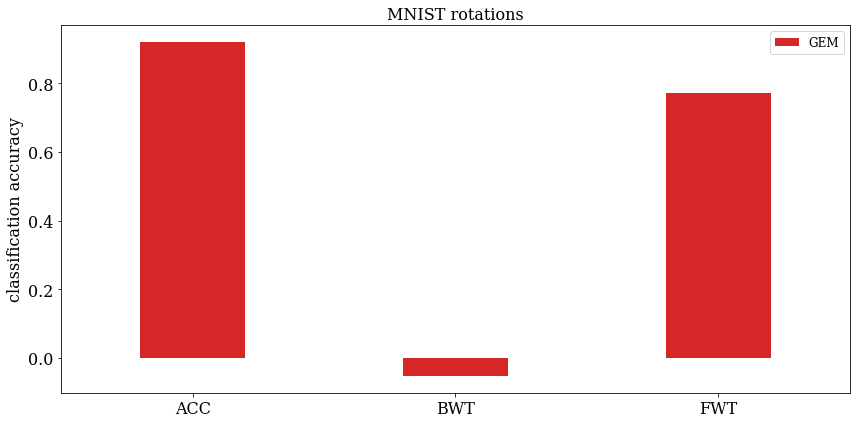

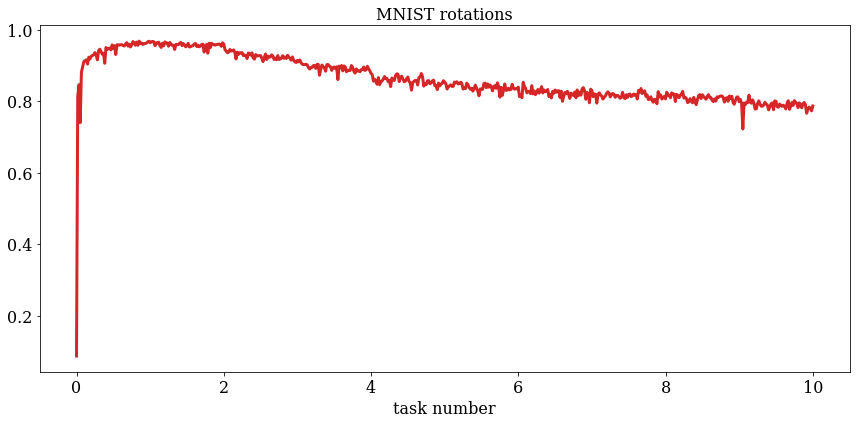

In [ ]:
# plotting the results
import matplotlib as mpl
mpl.use('Agg')
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.family"] = "DejaVu Serif"

from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import torch

models = ['gem']
datasets = ['mnist_rotations']

names_datasets = {'mnist_rotations': 'MNIST rotations'}

names_models = {'gem': 'GEM'}

colors = {'gem': 'C3'}

barplot = {}

for dataset in datasets:
    barplot[dataset] = {}
    for model in models:
        barplot[dataset][model] = {}
        matches = glob(model + '*' + dataset + '*.pt')
        if len(matches):
            data = torch.load(matches[0], map_location=lambda storage, loc: storage)
            acc, bwt, fwt = data[3][:]
            barplot[dataset][model]['acc'] = acc
            barplot[dataset][model]['bwt'] = bwt
            barplot[dataset][model]['fwt'] = fwt

for dataset in datasets:
    x_lab = []
    y_acc = []
    y_bwt = []
    y_fwt = []

    for i, model in enumerate(models):
        if barplot[dataset][model] != {}:
            x_lab.append(model)
            y_acc.append(barplot[dataset][model]['acc'])
            y_bwt.append(barplot[dataset][model]['bwt'])
            y_fwt.append(barplot[dataset][model]['fwt'])

    x_ind = np.arange(len(y_acc))

    plt.figure(figsize=(12, 6))
    all_colors = []
    for xi, yi, li in zip(x_ind, y_acc, x_lab):
        plt.bar(xi, yi, label=names_models[li], color=colors[li])
        all_colors.append(colors[li])
    plt.bar(x_ind + (len(y_acc) + 1) * 1, y_bwt, color=all_colors)
    plt.bar(x_ind + (len(y_acc) + 1) * 2, y_fwt, color=all_colors)
    plt.xticks([0.01, 2, 4], ['ACC', 'BWT', 'FWT'], fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(-1, len(y_acc) * 3 + 2)
    plt.ylabel('classification accuracy', fontsize=16)
    plt.title(names_datasets[dataset], fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig('barplot_%s.pdf' % dataset, bbox_inches='tight')
    plt.show()

evoplot = {}

for dataset in datasets:
    evoplot[dataset] = {}
    for model in models:
        matches = glob(model + '*' + dataset + '*.pt')
        if len(matches):
            data = torch.load(matches[0], map_location=lambda storage, loc: storage)
            evoplot[dataset][model] = data[1][:, 0].numpy()

for dataset in datasets:

    plt.figure(figsize=(12, 6))
    for model in models:
        if model in evoplot[dataset]:
            x = np.arange(len(evoplot[dataset][model]))
            x = (x - x.min()) / (x.max() - x.min()) * 10
            plt.plot(x, evoplot[dataset][model], color=colors[model], lw=3)
            plt.xticks(range(0, 11, 2))

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('task number', fontsize=16)
    plt.title(names_datasets[dataset], fontsize=16)
    plt.tight_layout()
    plt.savefig('evoplot_%s.pdf' % dataset, bbox_inches='tight')
    plt.show()

## Results

The figure above shows us the average accuracy (ACC), backward transfer (BWT) and forward transfer (FWT) for the dataset MNIST. </br>
Final Accuracy = 0.928497</br>
Backward Trasnfer = -0.046793</br>
Forward Trasnfer = 0.757682</br>
We can visualize that GEM minimizes backward transfer, while exhibiting a positive fordward transfer.

# References

- David Lopez-Paz and Marc' Aurelio Ranzato. Gradient Episodic Memory for Continual Learning.
- Continual Lifelong Learning with Neural Networks: A Review . German I. Parisi, Ronald Kemker, Jose L. Part, Christopher Kanan, Stefan Wermter.